Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

Nguyễn Thị Hồng Thi

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import pandas as pd
PATH = "HomeWork-churn_rate_prediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.shape

(36992, 25)

## Data Analysis

In [20]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
print("Categorical_cols:", categorical_cols)
print("Numerical_cols: ", numerical_cols)

Categorical_cols: ['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
Numerical_cols:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [6]:
'''import pandas_profiling

import streamlit as st

from streamlit_pandas_profiling import st_profile_report
ProfileReport(df)'''

'import pandas_profiling\n\nimport streamlit as st\n\nfrom streamlit_pandas_profiling import st_profile_report\nProfileReport(df)'

In [21]:
df[categorical_cols].isnull().sum()

customer_id                        0
Name                               0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [8]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


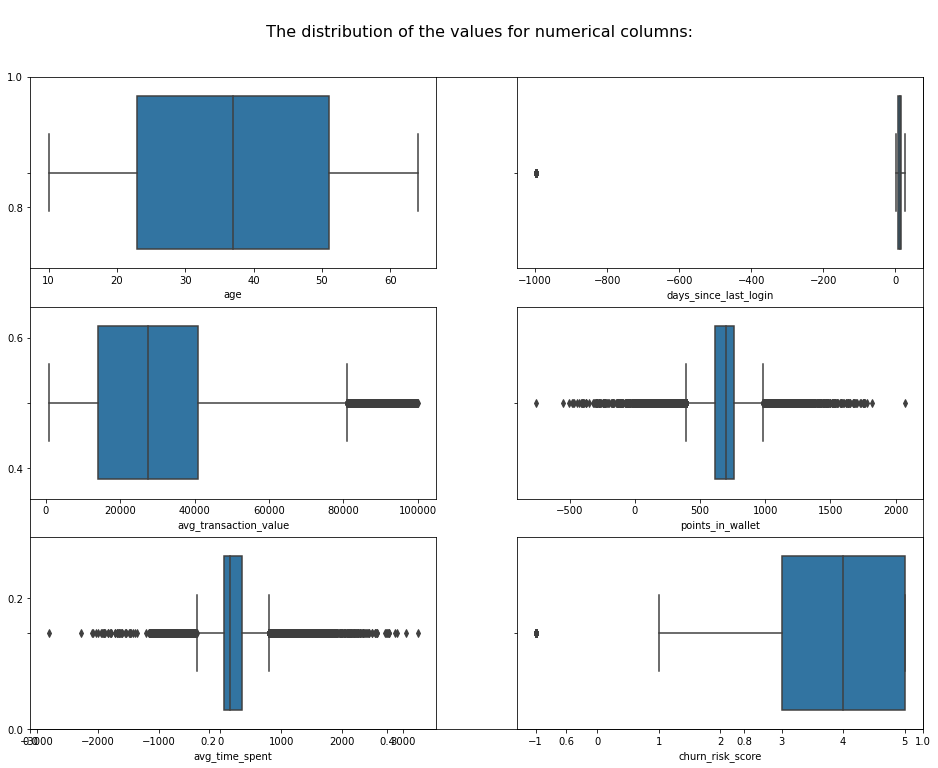

In [22]:
# Phân phối của các numerical feature
fig = plt.figure(figsize= (16, 12))
plt.title('\n The distribution of the values for numerical columns:\n \n', fontsize= 16)
axs = fig.subplots(nrows=3, ncols= 2)
sns.boxplot(data = df, x= 'age', ax = axs[0,0])
sns.boxplot(data = df, x= 'days_since_last_login',ax = axs[0,1])
sns.boxplot(data = df, x= 'avg_transaction_value',ax = axs[1,0])
sns.boxplot(data = df, x= 'points_in_wallet', ax= axs[1,1])
sns.boxplot(data = df, x= 'avg_time_spent', ax= axs[2,0])
sns.boxplot(data = df, x= 'churn_risk_score', ax= axs[2,1])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_336/3411019823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


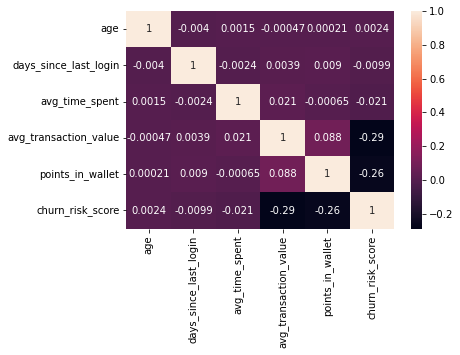

In [23]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Preprocessing

In [13]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()

    return df

In [15]:
df = preprocessing_data(df.copy())

In [16]:
df.shape

(28373, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28373 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   28373 non-null  object 
 1   Name                          28373 non-null  object 
 2   age                           28373 non-null  int64  
 3   gender                        28373 non-null  object 
 4   security_no                   28373 non-null  object 
 5   region_category               28373 non-null  object 
 6   membership_category           28373 non-null  object 
 7   joining_date                  28373 non-null  object 
 8   joined_through_referral       28373 non-null  object 
 9   referral_id                   28373 non-null  object 
 10  preferred_offer_types         28373 non-null  object 
 11  medium_of_operation           28373 non-null  object 
 12  internet_option               28373 non-null  object 
 13  l

In [12]:
# Thay thế các giá trị âm trong cột 'days_since_last_login' thành giá trị medium dương
df.loc[df['days_since_last_login'] < 0, 'days_since_last_login'] = df['days_since_last_login'].loc[df['days_since_last_login'] > 0].median()

In [13]:
# Thay thế các giá trị âm trong cột 'avg_time_spent' thành giá trị medium dương
df.loc[df['avg_time_spent'] < 0, 'avg_time_spent'] = df['avg_time_spent'].loc[df['avg_time_spent'] > 0].median()

In [14]:
# Thay thế các giá trị âm trong cột 'avg_time_spent' thành giá trị medium dương
df.loc[df['points_in_wallet'] < 0, 'points_in_wallet'] = df['points_in_wallet'].loc[df['points_in_wallet'] > 0].median() 

In [555]:
# Các cột 'Name', 'referral_id' không liên quan đến kết quả dự đoán nên loại bỏ các cột này
df = df.drop(['customer_id','Name', 'security_no', 'referral_id'], axis = 1)

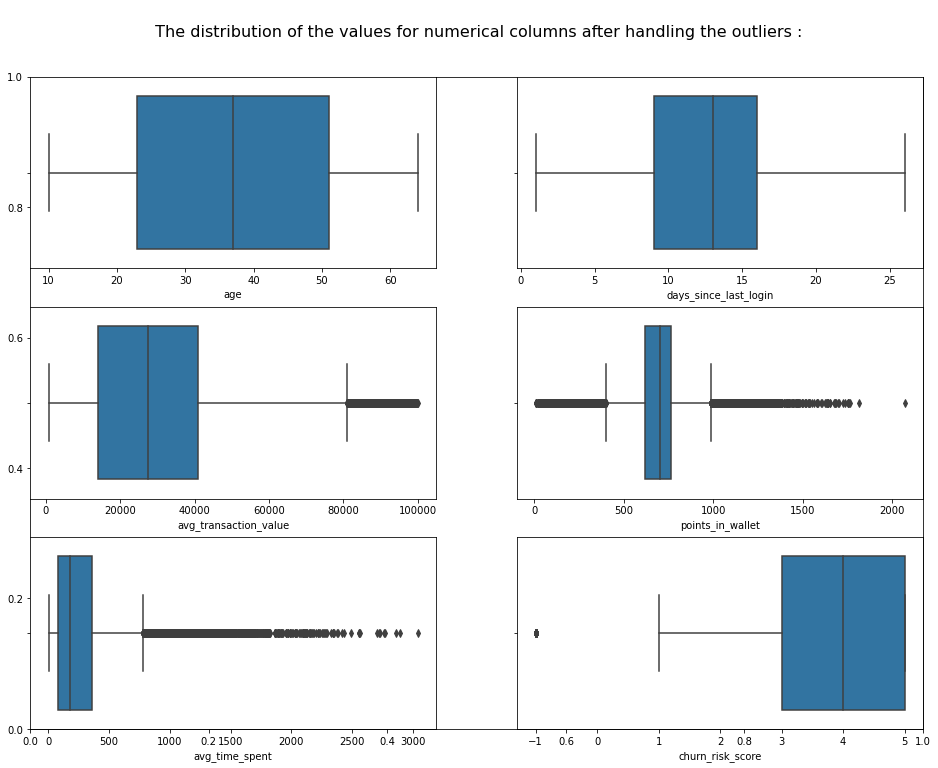

In [15]:

fig = plt.figure(figsize= (16, 12))
plt.title('\n The distribution of the values for numerical columns after handling the outliers :\n \n' , fontsize= 16)
axs = fig.subplots(nrows=3, ncols= 2)
sns.boxplot(data = df, x= 'age', ax = axs[0,0])
sns.boxplot(data = df, x= 'days_since_last_login',ax = axs[0,1])
sns.boxplot(data = df, x= 'avg_transaction_value',ax = axs[1,0])
sns.boxplot(data = df, x= 'points_in_wallet', ax= axs[1,1])
sns.boxplot(data = df, x= 'avg_time_spent', ax= axs[2,0])
sns.boxplot(data = df, x= 'churn_risk_score', ax= axs[2,1])
plt.show()

## Feature Engineering

In [16]:
# Heatmap
import seaborn as sns
from sklearn import preprocessing 
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    label_encoder = preprocessing.LabelEncoder()
    a = df.columns
    for i in a[:-1]:
        df[i] = df[i].astype('|S')
        df[i] = label_encoder.fit_transform(df[i]) 
 
    return df


In [17]:
df=apply_feature_engineering(df)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,24720,22051,8,0,26668,2,3,959,1,9603,...,9080,23589,570,18000,1,1,0,1,4,2
2,4529,19480,34,0,1144,1,2,680,2,405,...,14281,6402,598,3923,0,1,1,3,3,5
3,24843,8084,27,1,24890,0,2,667,2,4654,...,14528,8854,1251,5937,0,1,1,4,3,5
4,4653,19011,21,0,22828,0,2,985,1,9603,...,1152,8369,567,10496,0,1,1,2,3,5
5,26213,15752,3,1,20385,0,1,372,1,9603,...,12703,2246,601,14294,1,0,1,4,0,3


In [18]:
df2 = df

In [19]:
df.loc[df['churn_risk_score'] == -1, 'churn_risk_score'] = 1

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

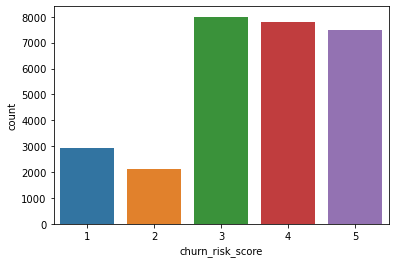

In [20]:
sns.countplot('churn_risk_score', data=df)

In [91]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")

    X = df[feature_names]
    y = df.churn_risk_score
   
    return X, y

X, y = prepare_X_y(df.copy())


# Apply machine learning model

## Train-test split

In [92]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

#### Decision Tree

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(trainX, trainY)

pred = model.predict(testX)
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           1       0.52      0.57      0.54       571
           2       0.75      0.75      0.75       423
           3       0.89      0.87      0.88      1573
           4       0.67      0.66      0.66      1564
           5       0.73      0.73      0.73      1544

    accuracy                           0.73      5675
   macro avg       0.71      0.71      0.71      5675
weighted avg       0.74      0.73      0.73      5675



In [26]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

clf = DecisionTreeClassifier()
pipe = Pipeline(steps=[("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=2)
search.fit(trainX, trainY)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))



Best parameter (CV score=0.732):
{'tree__criterion': 'log_loss'}
              precision    recall  f1-score   support

           1       0.53      0.56      0.54       571
           2       0.73      0.72      0.73       423
           3       0.89      0.88      0.89      1573
           4       0.66      0.64      0.65      1564
           5       0.73      0.74      0.73      1544

    accuracy                           0.73      5675
   macro avg       0.71      0.71      0.71      5675
weighted avg       0.73      0.73      0.73      5675



In [27]:

def calculate_performance(y_test, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("Precision: ", precision_score(y_test, y_pred, average = 'macro'))
    print("Recall: ", recall_score(y_test, y_pred, average = 'macro'))
    print("F1: ", f1_score(y_test, y_pred, average = 'macro'))

    # Todo: Only choose one of them as your score for the question 7
    main_score = recall_score(y_test, y_pred, average = 'macro')
    return main_score


In [28]:
model = DecisionTreeClassifier()
model.fit(trainX, trainY)
y_pred = model.predict(testX)
main_score = calculate_performance(testY, y_pred)
print("Main score: ", main_score)

Precision:  0.7101297074259237
Recall:  0.7132396967092125
F1:  0.71140783712484
Main score:  0.7132396967092125


In [93]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_oversampling, Y_train_oversampling = smote.fit_resample(trainX, trainY)

In [30]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()
pipe = Pipeline(steps=[("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=2)
search.fit(X_train_oversampling, Y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.734):
{'tree__criterion': 'entropy'}
              precision    recall  f1-score   support

           1       0.45      0.53      0.48       571
           2       0.65      0.71      0.68       423
           3       0.88      0.83      0.86      1573
           4       0.66      0.65      0.66      1564
           5       0.72      0.71      0.71      1544

    accuracy                           0.71      5675
   macro avg       0.67      0.69      0.68      5675
weighted avg       0.72      0.71      0.71      5675



#### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
model.fit(X_train_oversampling, Y_train_oversampling)
pred = model.predict(testX)
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           1       0.75      0.50      0.60       571
           2       0.67      0.82      0.74       423
           3       0.87      0.90      0.89      1573
           4       0.68      0.59      0.63      1564
           5       0.69      0.81      0.74      1544

    accuracy                           0.74      5675
   macro avg       0.73      0.72      0.72      5675
weighted avg       0.74      0.74      0.74      5675



In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
pipe = Pipeline(steps=[("random_forest", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'random_forest__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=2)
search.fit(X_train_oversampling, Y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.787):
{'random_forest__criterion': 'log_loss'}
              precision    recall  f1-score   support

           1       0.76      0.49      0.59       571
           2       0.66      0.81      0.73       423
           3       0.87      0.90      0.88      1573
           4       0.69      0.59      0.64      1564
           5       0.69      0.82      0.75      1544

    accuracy                           0.74      5675
   macro avg       0.73      0.72      0.72      5675
weighted avg       0.75      0.74      0.74      5675



#### XGBoost

In [79]:
# Thay thế giá trị 5 bằng giá trị 0 trong cột label
X_train = trainX
Y_train = trainY
Y_test = testY
X_test = testX

Y_train = np.where(Y_train == 5, 0, Y_train)
Y_test = np.where(Y_test == 5, 0, Y_test)

In [95]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_oversampling, Y_train_oversampling = smote.fit_resample(X_train, Y_train)

In [88]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

xgb = Pipeline(steps=[('scaler', StandardScaler()),
                         ('model', XGBClassifier())])

xgb.fit(X_train_oversampling, Y_train_oversampling)

pred = xgb.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1544
           1       0.71      0.51      0.60       571
           2       0.71      0.77      0.74       423
           3       0.89      0.93      0.91      1573
           4       0.70      0.61      0.65      1564

    accuracy                           0.76      5675
   macro avg       0.74      0.73      0.73      5675
weighted avg       0.76      0.76      0.75      5675



#### CatBoost

In [101]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Tạo một pipeline để thực hiện các bước tiền xử lý và mô hình hóa
catb = Pipeline([
    ('scaler', StandardScaler()), # tiền xử lý dữ liệu
    ('classifier', CatBoostClassifier()) # mô hình hóa với CatBoost
])

catb.fit(X_train_oversampling, Y_train_oversampling)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = catb.predict(X_test)
print(classification_report(Y_test, predicted_label))

Learning rate set to 0.094444
0:	learn: 1.4559733	total: 52.8ms	remaining: 52.7s
1:	learn: 1.3487876	total: 92.3ms	remaining: 46s
2:	learn: 1.2595566	total: 134ms	remaining: 44.6s
3:	learn: 1.1890745	total: 172ms	remaining: 42.9s
4:	learn: 1.1295959	total: 228ms	remaining: 45.3s
5:	learn: 1.0820952	total: 266ms	remaining: 44.1s
6:	learn: 1.0372384	total: 304ms	remaining: 43.1s
7:	learn: 0.9978425	total: 345ms	remaining: 42.7s
8:	learn: 0.9659109	total: 384ms	remaining: 42.3s
9:	learn: 0.9351418	total: 423ms	remaining: 41.9s
10:	learn: 0.9070275	total: 474ms	remaining: 42.6s
11:	learn: 0.8829960	total: 515ms	remaining: 42.4s
12:	learn: 0.8612290	total: 555ms	remaining: 42.1s
13:	learn: 0.8429502	total: 595ms	remaining: 41.9s
14:	learn: 0.8251696	total: 633ms	remaining: 41.6s
15:	learn: 0.8061270	total: 673ms	remaining: 41.4s
16:	learn: 0.7893202	total: 724ms	remaining: 41.9s
17:	learn: 0.7768863	total: 761ms	remaining: 41.5s
18:	learn: 0.7648406	total: 798ms	remaining: 41.2s
19:	learn: 

162:	learn: 0.4733270	total: 8.13s	remaining: 41.8s
163:	learn: 0.4728406	total: 8.18s	remaining: 41.7s
164:	learn: 0.4722167	total: 8.23s	remaining: 41.6s
165:	learn: 0.4718610	total: 8.27s	remaining: 41.6s
166:	learn: 0.4715712	total: 8.31s	remaining: 41.5s
167:	learn: 0.4711784	total: 8.35s	remaining: 41.3s
168:	learn: 0.4705302	total: 8.39s	remaining: 41.3s
169:	learn: 0.4699002	total: 8.43s	remaining: 41.2s
170:	learn: 0.4695649	total: 8.47s	remaining: 41.1s
171:	learn: 0.4685570	total: 8.51s	remaining: 41s
172:	learn: 0.4679709	total: 8.55s	remaining: 40.9s
173:	learn: 0.4675533	total: 8.6s	remaining: 40.8s
174:	learn: 0.4670987	total: 8.64s	remaining: 40.7s
175:	learn: 0.4666151	total: 8.67s	remaining: 40.6s
176:	learn: 0.4661845	total: 8.71s	remaining: 40.5s
177:	learn: 0.4658631	total: 8.74s	remaining: 40.4s
178:	learn: 0.4655396	total: 8.78s	remaining: 40.3s
179:	learn: 0.4651171	total: 8.81s	remaining: 40.2s
180:	learn: 0.4645556	total: 8.86s	remaining: 40.1s
181:	learn: 0.4

324:	learn: 0.4077447	total: 15.1s	remaining: 31.4s
325:	learn: 0.4073120	total: 15.2s	remaining: 31.3s
326:	learn: 0.4069570	total: 15.2s	remaining: 31.3s
327:	learn: 0.4066542	total: 15.2s	remaining: 31.2s
328:	learn: 0.4060466	total: 15.3s	remaining: 31.1s
329:	learn: 0.4056811	total: 15.3s	remaining: 31.1s
330:	learn: 0.4052383	total: 15.4s	remaining: 31s
331:	learn: 0.4047418	total: 15.4s	remaining: 31s
332:	learn: 0.4044887	total: 15.4s	remaining: 30.9s
333:	learn: 0.4039876	total: 15.5s	remaining: 30.8s
334:	learn: 0.4037745	total: 15.5s	remaining: 30.8s
335:	learn: 0.4035479	total: 15.5s	remaining: 30.7s
336:	learn: 0.4031806	total: 15.6s	remaining: 30.7s
337:	learn: 0.4027217	total: 15.6s	remaining: 30.6s
338:	learn: 0.4023872	total: 15.7s	remaining: 30.5s
339:	learn: 0.4020011	total: 15.7s	remaining: 30.5s
340:	learn: 0.4016577	total: 15.7s	remaining: 30.4s
341:	learn: 0.4015073	total: 15.8s	remaining: 30.3s
342:	learn: 0.4011208	total: 15.8s	remaining: 30.3s
343:	learn: 0.40

486:	learn: 0.3593652	total: 22.2s	remaining: 23.4s
487:	learn: 0.3590989	total: 22.3s	remaining: 23.4s
488:	learn: 0.3588665	total: 22.3s	remaining: 23.3s
489:	learn: 0.3585294	total: 22.3s	remaining: 23.2s
490:	learn: 0.3583248	total: 22.4s	remaining: 23.2s
491:	learn: 0.3580626	total: 22.4s	remaining: 23.1s
492:	learn: 0.3577909	total: 22.5s	remaining: 23.1s
493:	learn: 0.3575763	total: 22.5s	remaining: 23s
494:	learn: 0.3574139	total: 22.5s	remaining: 23s
495:	learn: 0.3571961	total: 22.6s	remaining: 22.9s
496:	learn: 0.3569267	total: 22.6s	remaining: 22.9s
497:	learn: 0.3567022	total: 22.7s	remaining: 22.8s
498:	learn: 0.3564083	total: 22.7s	remaining: 22.8s
499:	learn: 0.3562367	total: 22.8s	remaining: 22.8s
500:	learn: 0.3560442	total: 22.8s	remaining: 22.7s
501:	learn: 0.3557926	total: 22.9s	remaining: 22.7s
502:	learn: 0.3553941	total: 23s	remaining: 22.7s
503:	learn: 0.3551452	total: 23s	remaining: 22.7s
504:	learn: 0.3548832	total: 23.1s	remaining: 22.7s
505:	learn: 0.354636

648:	learn: 0.3196378	total: 29.5s	remaining: 16s
649:	learn: 0.3194911	total: 29.5s	remaining: 15.9s
650:	learn: 0.3192652	total: 29.6s	remaining: 15.9s
651:	learn: 0.3190908	total: 29.6s	remaining: 15.8s
652:	learn: 0.3188797	total: 29.7s	remaining: 15.8s
653:	learn: 0.3186341	total: 29.7s	remaining: 15.7s
654:	learn: 0.3184777	total: 29.8s	remaining: 15.7s
655:	learn: 0.3182933	total: 29.8s	remaining: 15.6s
656:	learn: 0.3181928	total: 29.8s	remaining: 15.6s
657:	learn: 0.3177524	total: 29.9s	remaining: 15.5s
658:	learn: 0.3174348	total: 29.9s	remaining: 15.5s
659:	learn: 0.3172008	total: 30s	remaining: 15.4s
660:	learn: 0.3170218	total: 30s	remaining: 15.4s
661:	learn: 0.3168875	total: 30.1s	remaining: 15.3s
662:	learn: 0.3166262	total: 30.1s	remaining: 15.3s
663:	learn: 0.3164114	total: 30.1s	remaining: 15.2s
664:	learn: 0.3163288	total: 30.2s	remaining: 15.2s
665:	learn: 0.3161107	total: 30.2s	remaining: 15.2s
666:	learn: 0.3156732	total: 30.3s	remaining: 15.1s
667:	learn: 0.3154

809:	learn: 0.2876930	total: 36.8s	remaining: 8.64s
810:	learn: 0.2875033	total: 36.9s	remaining: 8.6s
811:	learn: 0.2873523	total: 36.9s	remaining: 8.55s
812:	learn: 0.2871980	total: 37s	remaining: 8.5s
813:	learn: 0.2870879	total: 37s	remaining: 8.45s
814:	learn: 0.2869329	total: 37s	remaining: 8.41s
815:	learn: 0.2866529	total: 37.1s	remaining: 8.36s
816:	learn: 0.2865429	total: 37.1s	remaining: 8.31s
817:	learn: 0.2864306	total: 37.2s	remaining: 8.27s
818:	learn: 0.2861879	total: 37.2s	remaining: 8.22s
819:	learn: 0.2860250	total: 37.2s	remaining: 8.17s
820:	learn: 0.2857349	total: 37.3s	remaining: 8.13s
821:	learn: 0.2856848	total: 37.3s	remaining: 8.08s
822:	learn: 0.2855642	total: 37.4s	remaining: 8.04s
823:	learn: 0.2853744	total: 37.4s	remaining: 7.99s
824:	learn: 0.2851866	total: 37.5s	remaining: 7.95s
825:	learn: 0.2850597	total: 37.5s	remaining: 7.9s
826:	learn: 0.2848643	total: 37.6s	remaining: 7.86s
827:	learn: 0.2847332	total: 37.6s	remaining: 7.81s
828:	learn: 0.2844880

971:	learn: 0.2595735	total: 44.2s	remaining: 1.27s
972:	learn: 0.2593909	total: 44.2s	remaining: 1.23s
973:	learn: 0.2592755	total: 44.3s	remaining: 1.18s
974:	learn: 0.2591727	total: 44.3s	remaining: 1.14s
975:	learn: 0.2590269	total: 44.3s	remaining: 1.09s
976:	learn: 0.2588972	total: 44.4s	remaining: 1.04s
977:	learn: 0.2588039	total: 44.4s	remaining: 999ms
978:	learn: 0.2586684	total: 44.5s	remaining: 954ms
979:	learn: 0.2584313	total: 44.5s	remaining: 908ms
980:	learn: 0.2583255	total: 44.5s	remaining: 863ms
981:	learn: 0.2581292	total: 44.6s	remaining: 817ms
982:	learn: 0.2579758	total: 44.6s	remaining: 772ms
983:	learn: 0.2578510	total: 44.7s	remaining: 726ms
984:	learn: 0.2577323	total: 44.7s	remaining: 681ms
985:	learn: 0.2576484	total: 44.8s	remaining: 635ms
986:	learn: 0.2575012	total: 44.8s	remaining: 590ms
987:	learn: 0.2573228	total: 44.8s	remaining: 545ms
988:	learn: 0.2572006	total: 44.9s	remaining: 499ms
989:	learn: 0.2570644	total: 44.9s	remaining: 454ms
990:	learn: 

Recall là metric phù hợp cho bài toán này. Với mục tiêu là xác định những khách hàng có nguy cơ rời đi thì Recall sẽ xác định tỷ lệ các trường hợp rời đi thực tế mà mô hình xác định chính xác là rời đi. Từ đó doanh nghiệp sẽ có thể đưa ra các biện pháp để cải thiện vấn đề. CatBoost là mô hình phù hợp nhất cho tập data này. Vì tập dữ liệu này phức tạp và không cân bằng mà CatBoost có thể xử lý tốt với dữ liệu bị bị thiếu và có nhiễu. Mô hình này có sử dụng Gradient Descent để tối ưu hóa hàm mất mát trong quá trình huấn luyện mô hình.